In [40]:
import argparse
import sys

experiment_name = 'enet_model_bce'
# experiment_name = 'enet_model'
im_size = 300
batch_size = 64
specific_data_path = '/home/sebastian/codes/data/ABGQI_mel_spectrograms/test'
file_name = 'test'
resume = f'./{experiment_name}/model_weights.pth'

In [41]:
import torch
import os
from torchvision import models
import os
import argparse
import sys
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, f1_score, classification_report
import numpy as np
import time
from tqdm import tqdm

In [42]:
# Initialize `args` as an empty Namespace
args = argparse.Namespace()

def get_args_parser():
    parser = argparse.ArgumentParser(description="Train and test a model with folder-based data structure.")
    parser.add_argument('--experiment_name', type=str, default=experiment_name)
    parser.add_argument('--resume', type=str, default=experiment_name)
    parser.add_argument('--input_size', type=tuple, default=im_size)
    parser.add_argument('--batch_size', type=int, default=batch_size)
    parser.add_argument('--file_name', default=file_name, type=str, help='file_name')
    parser.add_argument('--specific_data_path', default=specific_data_path, type=str,
                        help='dataset path')
    return parser

def parse_args():
    global args
    parser = get_args_parser()
    if 'ipykernel' in sys.modules:
        args, unknown = parser.parse_known_args(namespace=args)
    else:
        args = parser.parse_args(namespace=args)
    return args

args = parse_args()
print(args)

Namespace(experiment_name='enet_model_bce', resume='enet_model_bce', input_size=300, batch_size=64, file_name='test', specific_data_path='/home/sebastian/codes/data/ABGQI_mel_spectrograms/test')


In [43]:
from net.datasets import build_datasetv2

dataset_test = build_datasetv2(args=args)
data_loader_test = DataLoader(dataset_test, batch_size=args.batch_size)

test
Test dataset built with 250 images from /home/sebastian/codes/data/ABGQI_mel_spectrograms/test.


In [44]:
class_names = dataset_test.classes
num_classes = len(dataset_test.classes)
class_names

['anthro', 'bio', 'geo', 'other', 'quiet']

In [45]:
class CustomEfficientNet(nn.Module):
    def __init__(self, num_classes):
        super(CustomEfficientNet, self).__init__()
        self.base_model = models.efficientnet_b3(weights=models.EfficientNet_B3_Weights.IMAGENET1K_V1)
        self.base_model.classifier[1] = nn.Linear(self.base_model.classifier[1].in_features, num_classes)

    def forward(self, x):
        return self.base_model(x)
        
def load_model(model_path, num_classes):
    # Initialize the model architecture
    model = CustomEfficientNet(num_classes=num_classes).to(device)
    # Load the saved weights
    model.load_state_dict(torch.load(model_path, map_location=device))
    # Set the model to evaluation mode
    model.eval()
    return model

In [46]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# test_dir = os.path.join(args.data_path, 'test')
# test_transform = transforms.Compose([
#         transforms.Resize(args.im_size),
#         transforms.CenterCrop(args.im_size),
#         transforms.ToTensor()
# ])
# test_dataset = datasets.ImageFolder(root=test_dir, transform=test_transform)
# test_loader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False)
# num_classes = len(test_dataset.classes)
# class_names = test_dataset.classes
# class_names

In [47]:
model = load_model(resume, num_classes)
model

/tmp/ipykernel_400610/730413013.py:14: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


CustomEfficientNet(
  (base_model): EfficientNet(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
      (1): Sequential(
        (0): MBConv(
          (block): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=40, bias=False)
              (1): BatchNorm2d(40, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): SiLU(inplace=True)
            )
            (1): SqueezeExcitation(
              (avgpool): AdaptiveAvgPool2d(output_size=1)
              (fc1): Conv2d(40, 10, kernel_size=(1, 1), stride=(1, 1))
              (fc2): Conv2d(10, 40, kernel_size=(1, 1), stride=(1, 1))
              (activation): SiLU(inplace=True)
          

In [48]:
print(args)

Namespace(experiment_name='enet_model_bce', resume='enet_model_bce', input_size=300, batch_size=64, file_name='test', specific_data_path='/home/sebastian/codes/data/ABGQI_mel_spectrograms/test')


In [49]:
from net.metrics import get_metrics, count_parameters
from net.models import *

/home/sebastian/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:2956: UserWarning: The y_pred values do not sum to one. Make sure to pass probabilities.
  warnings.warn(


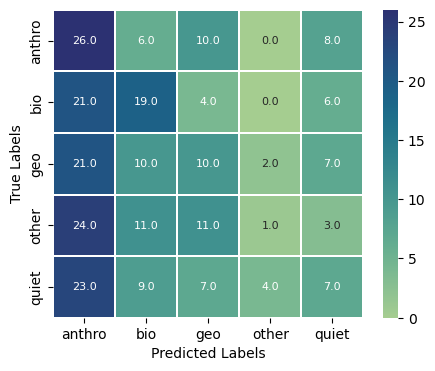

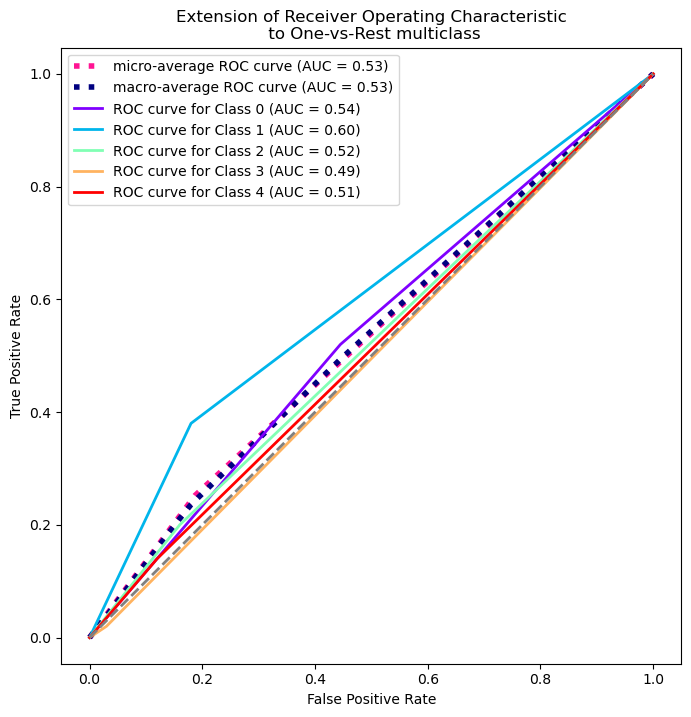

25.699732422828674
Files stored as in:
(PREDS): ./enet_model_bce/test_points.csv
Metrics on test-images during testing:
  details accuracy precision recall        f1     f0.75 specificity roc_auc
0  anthro     0.52  0.226087   0.52  0.315152  0.283843    0.293651  0.5375
1     bio     0.38  0.345455   0.38  0.361905  0.357143        0.55     0.6
2     geo      0.2  0.238095    0.2  0.217391  0.222816    0.623529    0.52
3   other     0.02  0.142857   0.02  0.035088  0.044484    0.911765   0.495
4   quiet     0.14  0.225806   0.14   0.17284  0.184989         0.7    0.51
5  totals    0.252   0.23566  0.252  0.220475  0.218655    0.615789  0.5325
Extra Metrics on test-images during testing:
        mcc        f2  balanced_accuracy  kappa  log_loss       loss  \
0  0.069707  0.233506              0.252  0.065  4.116775  25.699732   

   inf. time (s)  
0       0.047165  


In [50]:
metrics_df_test, indv_metrics_df_test  = evaluate_test(data_loader_test, model, device,class_names, experiment_name, file_name)
print(f"Metrics on test-images during testing:\n{metrics_df_test}")
print(f"Extra Metrics on test-images during testing:\n{indv_metrics_df_test}")

metrics_df_test.to_csv(f'./{experiment_name}/metrics_per_class_{file_name}.csv', index=False)
indv_metrics_df_test.to_csv(f'./{experiment_name}/metrics_indv_extras_{file_name}.csv', index=False)